In [1]:
from myproject.mypackage.pipeline import validateParams, runPipeline, find_outliers_z, modelDictionary, boxplotGrid
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("synthetic_loan_data.csv")
df.drop(columns=['CustomerID','Name'], inplace=True)
df
X = df.drop(columns='LoanApproved')
y = df['LoanApproved']

runPipeline(X, y, parameters={'model_name': 'tree','test_size': None, 'balance': 'smote'})


ModuleNotFoundError: No module named 'imblearn.model_selection'

accuracy: -0.807
Config: {'log_reg__max_iter': 1000, 'log_reg__random_state': 2024}
Train R² Score: 0.8266
Test R² Score: 0.8321
Test Set Accuracy: 0.8321
---------------------------


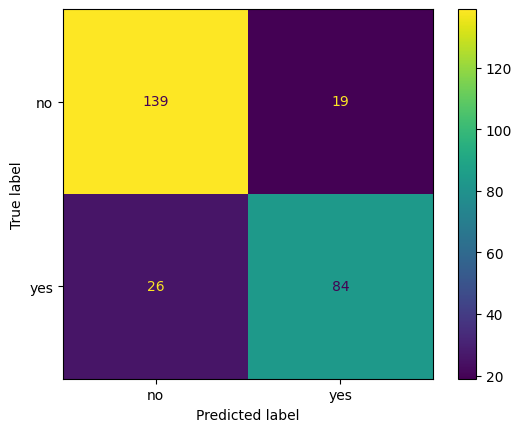

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       158
           1       0.82      0.76      0.79       110

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268

Optimal Threshold: 0.4714


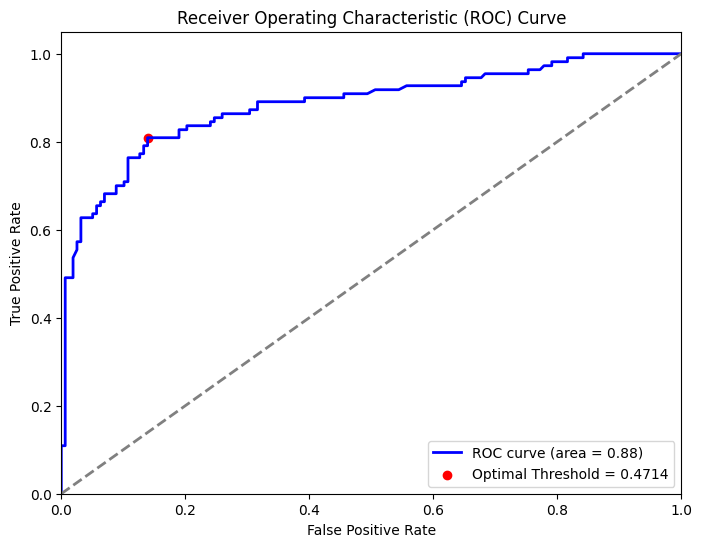

{'test_size': 0.3,
 'random_state': 2024,
 'max_iter': 1000,
 'strategy': 'median',
 'scaler_name': None,
 'model_name': 'log_reg',
 'grid': {'start': 0.1, 'stop': 2.1, 'step': 0.1},
 'scoring': 'accuracy',
 'cv': 5,
 'n_jobs': -1,
 'drop_cols': None,
 'n_neighbors': 3,
 'ccp_alpha': 0,
 'class_weight': None,
 'max_depth': None,
 'min_samples_split': None,
 'y_label_encoder': LabelEncoder(),
 'n_estimators': None,
 'verbose': 0,
 'balance': None,
 'pipeline_results': {'accuracy': 0.832089552238806,
  'accuracy_best_score': np.float64(0.8073290322580645),
  'accuracy_best_params': {'log_reg__max_iter': 1000,
   'log_reg__random_state': 2024},
  'y_pred': array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
         0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1

In [ ]:
df = sns.load_dataset("titanic")
df = df.drop(columns='survived')
X = df.drop(columns='alive')
y= df['alive']
runPipeline(X, y, parameters={'model_name': 'log_reg'})

accuracy: -0.936
Config: {'log_reg__max_iter': 10000, 'log_reg__random_state': 2024}
Train R² Score: 0.9357
Test R² Score: 0.9344
Test Set Accuracy: 0.9344
---------------------------


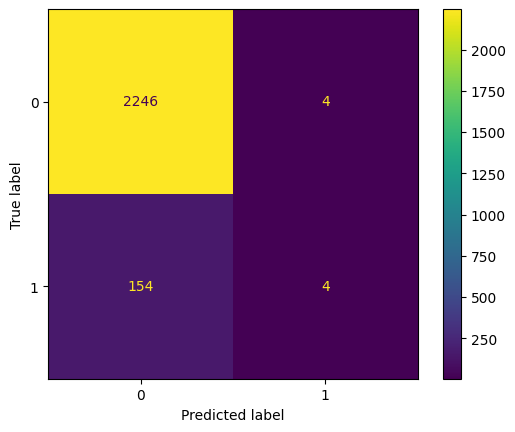

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2250
           1       0.50      0.03      0.05       158

    accuracy                           0.93      2408
   macro avg       0.72      0.51      0.51      2408
weighted avg       0.91      0.93      0.91      2408

Optimal Threshold: 0.0895


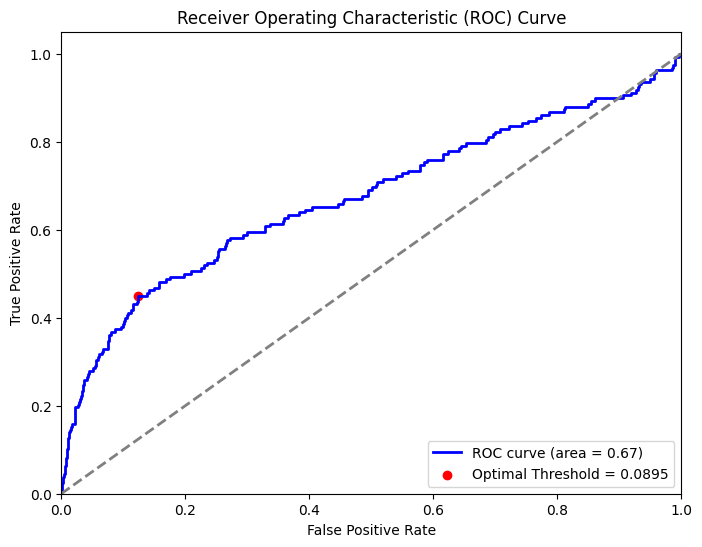

In [ ]:
df = pd.read_csv("Credit.csv")

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, parameters={'model_name': 'log_reg','max_iter': 10000})

accuracy: -0.668
Config: {'log_reg__max_iter': 10000, 'log_reg__random_state': 2024}
Train R² Score: 0.6683
Test R² Score: 0.6906
Test Set Accuracy: 0.6906
---------------------------


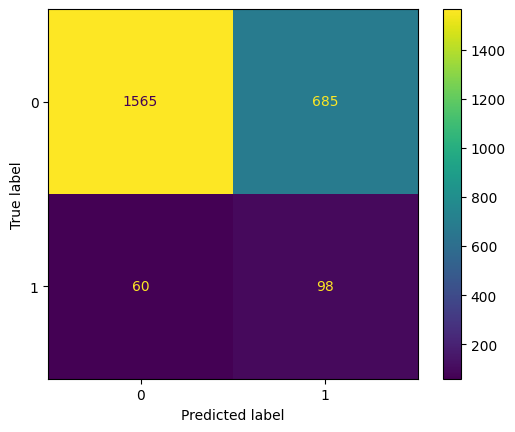

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      2250
           1       0.13      0.62      0.21       158

    accuracy                           0.69      2408
   macro avg       0.54      0.66      0.51      2408
weighted avg       0.91      0.69      0.77      2408

Optimal Threshold: 0.4699


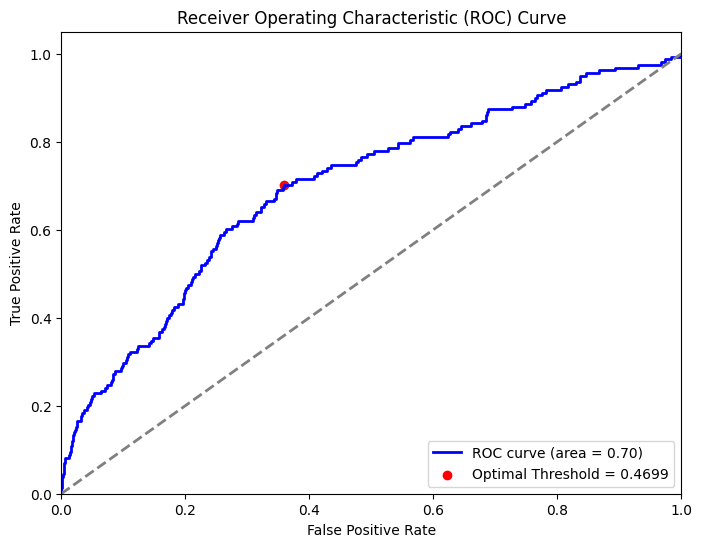

In [ ]:
df = pd.read_csv("Credit.csv")

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, parameters={'model_name': 'log_reg', 'test_size': .3, 'max_iter': 10000, 'balance': 'smote', 'scaler': 'minmax'})


accuracy: -0.937
Config: {'knn__n_neighbors': 4}
Train R² Score: 0.9385
Test R² Score: 0.9315
Test Set Accuracy: 0.9315
---------------------------


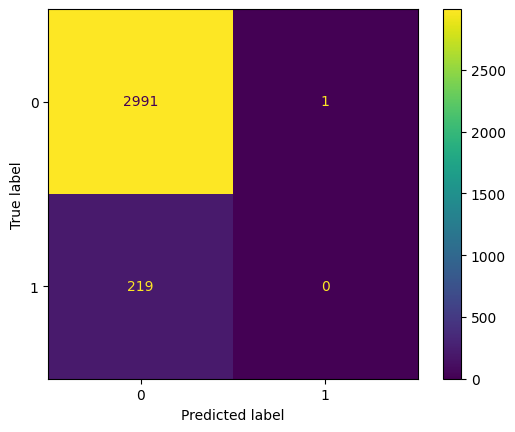

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2992
           1       0.00      0.00      0.00       219

    accuracy                           0.93      3211
   macro avg       0.47      0.50      0.48      3211
weighted avg       0.87      0.93      0.90      3211

Optimal Threshold: 0.2500


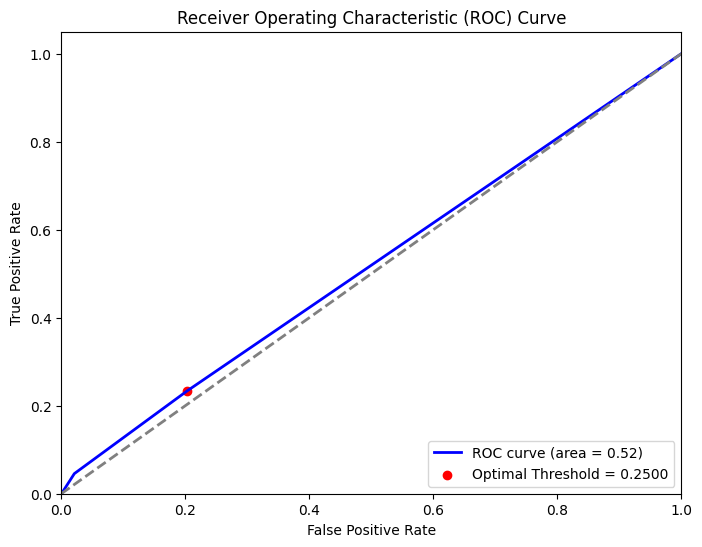

In [ ]:
df = pd.read_csv("Credit.csv")
for index, col in enumerate(df.drop(columns='Credit').columns):
    z_scores, mask, median = find_outliers_z(df, col)
    #print(f"{col}: {find_outliers_z(df, col)[1].count()[0]}")
    #print(find_outliers_z(df, col)[2])
    df.loc[df[col].index[mask], col] = np.nan

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, parameters={'model_name': 'knn','max_iter': 10000,'n_neighbors': 4,'test_size': .4})

accuracy: -0.876
Config: {'tree__ccp_alpha': np.float64(0.0), 'tree__class_weight': 'balanced', 'tree__min_samples_split': 6, 'tree__random_state': 2024}
Train R² Score: 0.9773
Test R² Score: 0.8841
Test Set Accuracy: 0.8841
---------------------------


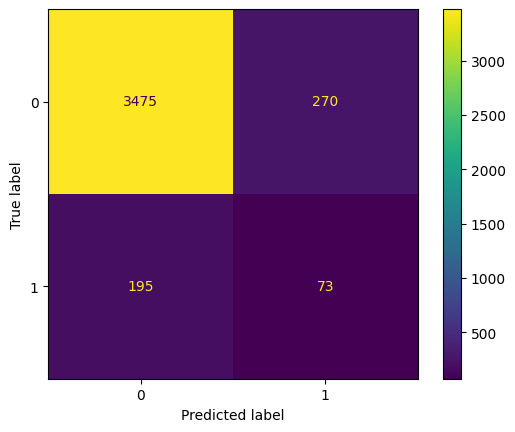

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3745
           1       0.21      0.27      0.24       268

    accuracy                           0.88      4013
   macro avg       0.58      0.60      0.59      4013
weighted avg       0.90      0.88      0.89      4013



<Figure size 1400x2000 with 0 Axes>

Optimal Threshold: 0.8344


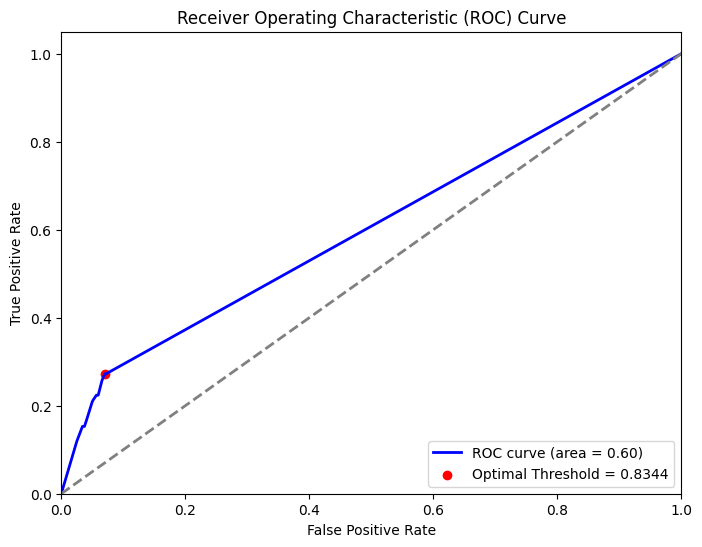

In [ ]:
df = pd.read_csv("Credit.csv")
for index, col in enumerate(df.drop(columns='Credit').columns):
    z_scores, mask, median = find_outliers_z(df, col)
    #print(f"{col}: {find_outliers_z(df, col)[1].count()[0]}")
    #print(find_outliers_z(df, col)[2])
    df.loc[df[col].index[mask], col] = np.nan

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, parameters={'model_name': 'tree','max_iter': 10000,'test_size': .5, 'ccp_alpha': 0,'min_samples_split': [6],'class_weight': 'balanced','grid': {'start': .00, 'stop': .0025, 'step': .000025}})

accuracy: -0.668
Config: {'svc__max_iter': 1000, 'svc__random_state': 2024}
Train R² Score: 0.6854
Test R² Score: 0.6754
Test Set Accuracy: 0.6754
---------------------------
accuracy: -0.801
Config: {'tree__ccp_alpha': np.float64(0.002), 'tree__min_samples_split': 6, 'tree__random_state': 2024}
Train R² Score: 0.9117
Test R² Score: 0.8582
Test Set Accuracy: 0.8582
---------------------------


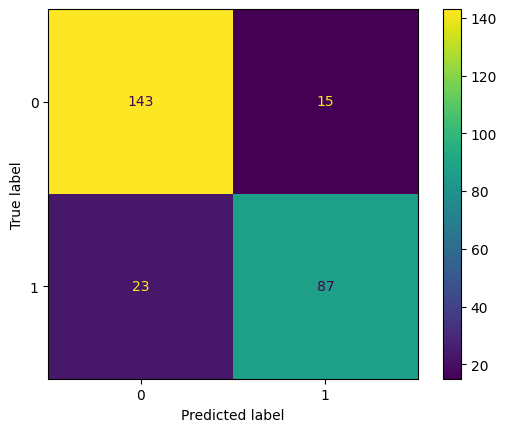

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       158
           1       0.85      0.79      0.82       110

    accuracy                           0.86       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.86      0.86      0.86       268



<Figure size 1400x2000 with 0 Axes>

Optimal Threshold: 0.6000


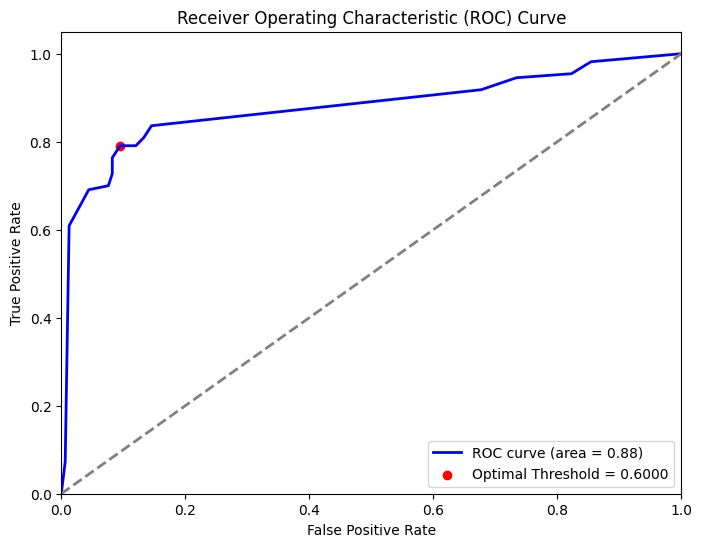

In [ ]:
df = sns.load_dataset("titanic")
null_counts = df.isnull().sum()
total_counts = df.shape[0]

df = df.drop('alive', axis=1)

X = df.drop(columns='survived')
y = df['survived']

model_a = runPipeline(X, y, showChart=False, parameters={'model_name': 'svc'})
model_b = runPipeline(X, y, showChart=True, parameters={'model_name': 'tree','test_size': .3,'min_samples_split': [6],'grid': {'start': .00, 'stop': .0025, 'step': .00025}})

accuracy: -0.698
Config: {'tree__ccp_alpha': np.float64(0.1), 'tree__random_state': 2024}
Train R² Score: 0.6978
Test R² Score: 0.7029
Test Set Accuracy: 0.7029
---------------------------
Model name:  tree


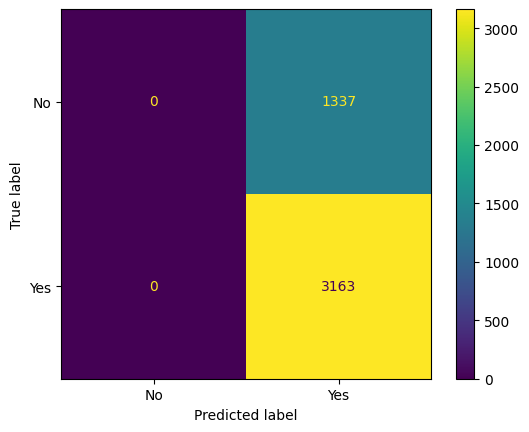

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

          No       0.00      0.00      0.00      1337
         Yes       0.70      1.00      0.83      3163

    accuracy                           0.70      4500
   macro avg       0.35      0.50      0.41      4500
weighted avg       0.49      0.70      0.58      4500



/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/caitincataldo/Documents/Coding/Machine Learning Class/Course 3 Project/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 

<Figure size 1400x2000 with 0 Axes>

Optimal Threshold: inf


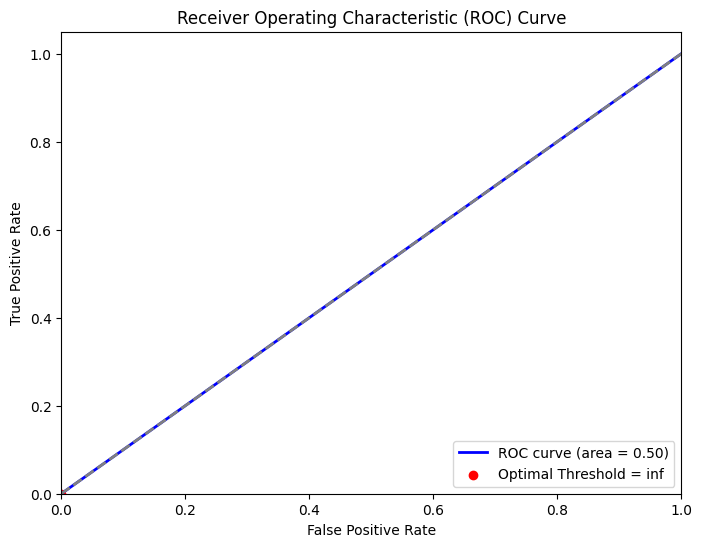

array(['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
      shape=(4500,), dtype=object)

In [ ]:
df = pd.read_csv("synthetic_loan_data.csv")
df.drop(columns=['CustomerID','Name'], inplace=True)
y = df['LoanApproved']
X = df.drop(columns='LoanApproved')

result = runPipeline(X, y, showChart=True, parameters={'model_name': 'tree','test_size': .5})
result['data']['y_train']

accuracy: -0.696
Config: {'log_reg__max_iter': 100000, 'log_reg__random_state': 2024}
Train R² Score: 0.6967
Test R² Score: 0.7006
Test Set Accuracy: 0.7006
---------------------------


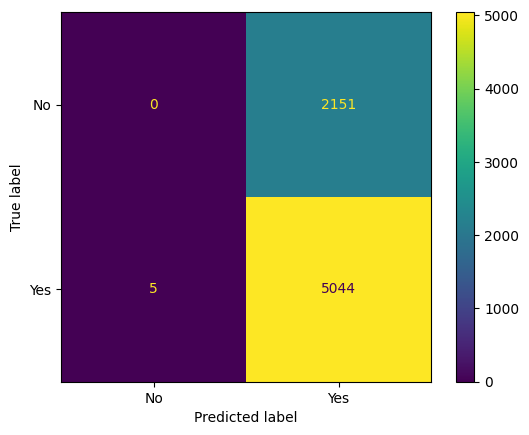

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2151
           1       0.70      1.00      0.82      5049

    accuracy                           0.70      7200
   macro avg       0.35      0.50      0.41      7200
weighted avg       0.49      0.70      0.58      7200

Optimal Threshold: 0.7658


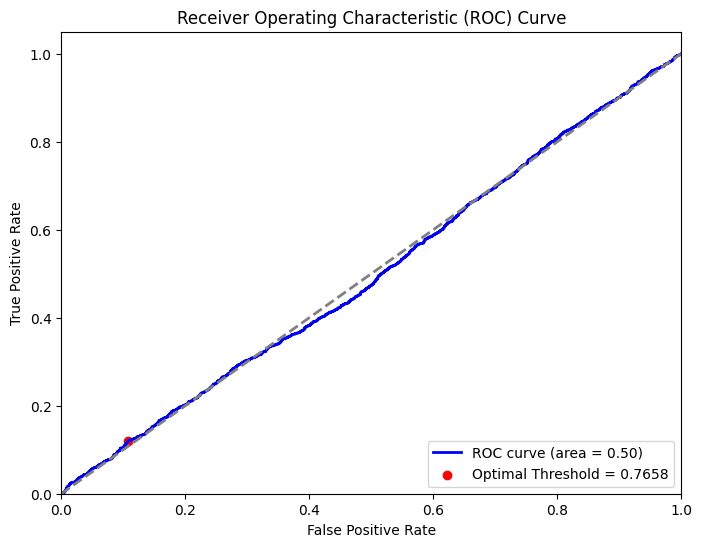

In [ ]:
results = runPipeline(X, y, parameters={'model_name': 'log_reg','max_iter': 100000,'test_size': .8, 'scaler': 'min_max_scaler'})

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


#x = df[['sepal length (cm)', 'petal length (cm)']]
#y = iris.data.Species

df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
